# Regression assumptions

## Example 1

In [19]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
# Generate a synthetic dataset that satisfies the assumptions
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values using the test set
y_pred = model.predict(X_test)

In [30]:
# Residuals
residuals = y_test - y_pred

# Create a DataFrame for easier plotting
df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'residuals': residuals})

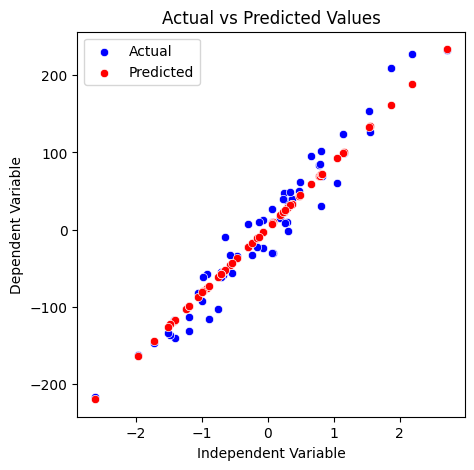

In [31]:
# Plotting data and regression
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X_test.flatten(), y=y_test, label='Actual', color='blue')
sns.scatterplot(x=X_test.flatten(), y=y_pred, label='Predicted', color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

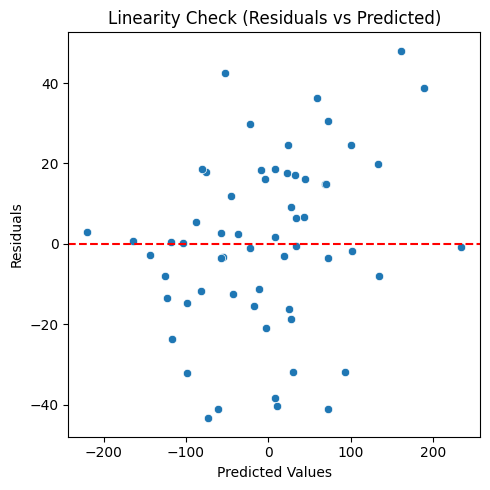

In [32]:
# Plot 1: Linearity
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residuals vs Predicted)')
plt.tight_layout()
plt.show()

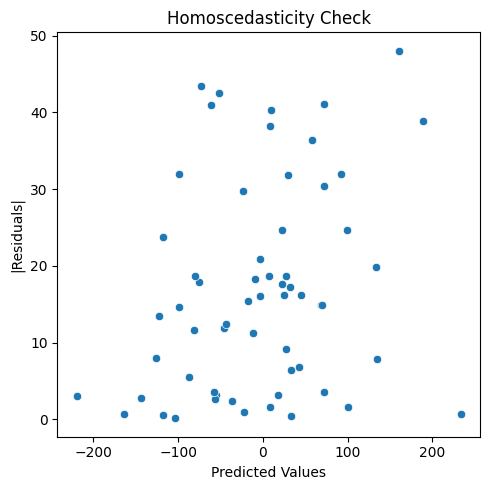

In [33]:
# Plot 2: Homoscedasticity
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel('Predicted Values')
plt.ylabel('|Residuals|')
plt.title('Homoscedasticity Check')
plt.tight_layout()
plt.show()

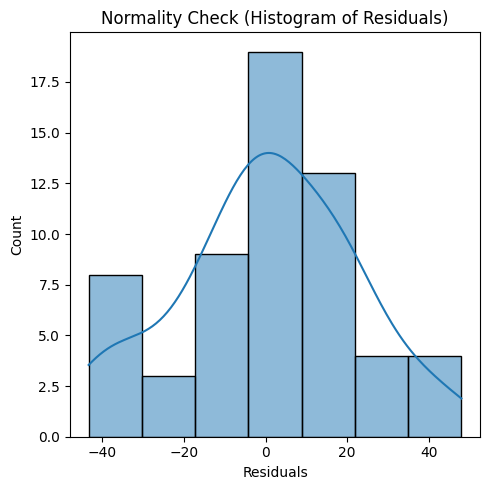

In [34]:
# Plot 3: Normality of Residuals
plt.figure(figsize=(5, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Normality Check (Histogram of Residuals)')
plt.tight_layout()
plt.show()

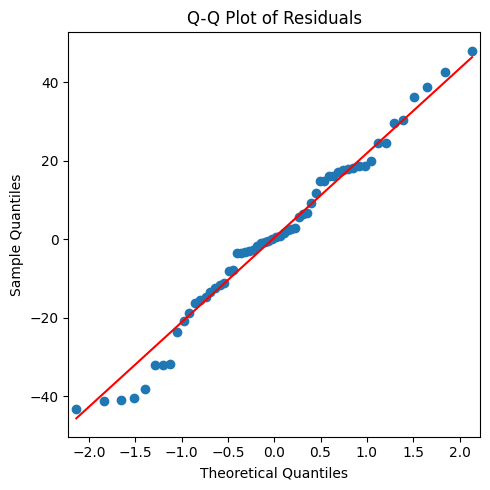

In [35]:
# Plot 4: Q-Q plot
plt.figure(figsize=(5, 5))
sm.qqplot(residuals, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

## Example 2

In [36]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [37]:
# Generate a synthetic dataset that does not satisfy the assumptions
# Introduce non-linearity and heteroscedasticity
np.random.seed(42)
X_non_linear = np.random.uniform(-3, 3, 200).reshape(-1, 1)
y_non_linear = X_non_linear**3 + np.random.normal(0, 5 + X_non_linear.flatten()**2, 200)

# Split data into training and testing sets
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(X_non_linear, y_non_linear, test_size=0.3, random_state=42)

In [38]:
# Fit a Linear Regression model
model_nl = LinearRegression()
model_nl.fit(X_train_nl, y_train_nl)

# Predict the values using the test set
y_pred_nl = model_nl.predict(X_test_nl)

# Residuals
residuals_nl = y_test_nl - y_pred_nl

In [39]:
# Flatten the residuals and other variables to resolve the dimension issue
y_test_nl = y_test_nl.flatten()
y_pred_nl = y_pred_nl.flatten()
residuals_nl = residuals_nl.flatten()

In [40]:
# Create a DataFrame for easier plotting
df_nl = pd.DataFrame({'y_test': y_test_nl, 'y_pred': y_pred_nl, 'residuals': residuals_nl})

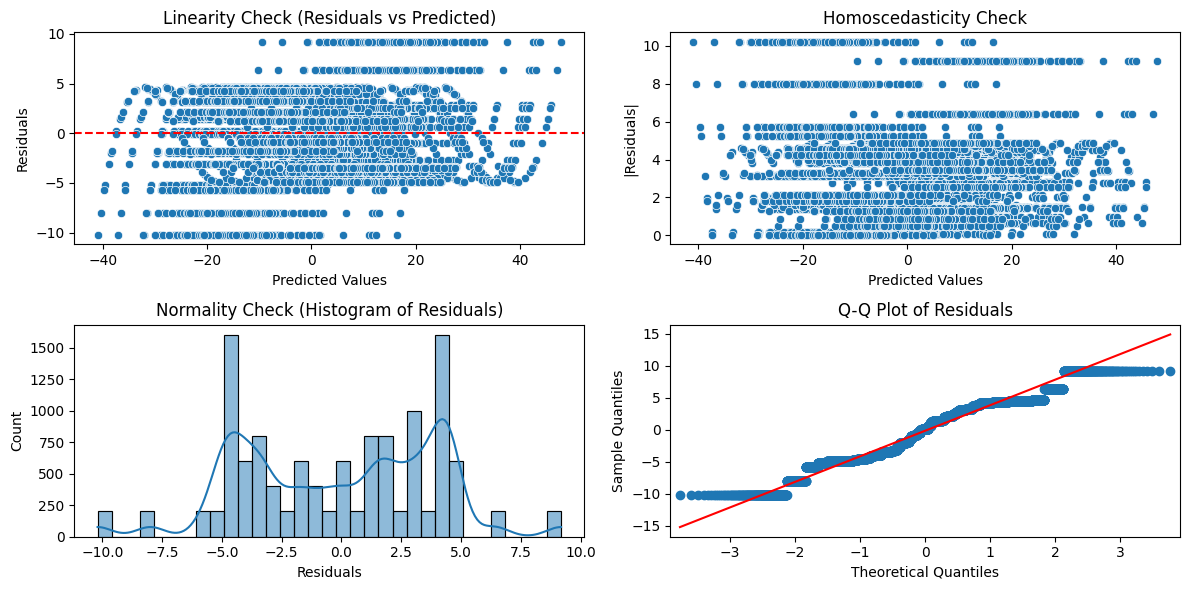

In [41]:
# Plot 1: Linearity
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred_nl, y=residuals_nl)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check (Residuals vs Predicted)')

# Plot 2: Homoscedasticity
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_pred_nl, y=np.abs(residuals_nl))
plt.xlabel('Predicted Values')
plt.ylabel('|Residuals|')
plt.title('Homoscedasticity Check')

# Plot 3: Normality of Residuals
plt.subplot(2, 2, 3)
sns.histplot(residuals_nl, kde=True)
plt.xlabel('Residuals')
plt.title('Normality Check (Histogram of Residuals)')

# Plot 4: Q-Q plot
plt.subplot(2, 2, 4)
sm.qqplot(residuals_nl, line='s', ax=plt.gca())
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

Exercise 3: Wine Dataset

Exercise 4: Advertising Dataset